<div style="text-align:center; background-color:#add8e6; padding:10px; border-radius:5px;">
    <h2 style="color:#000;">Quantium Virtual Internship - Retail Strategy and Analytics - Task 1</h2>
</div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re ## For data cleaning of string variables

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
transaction = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], unit='D', origin='1899-12-30')

In [4]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


- Let us look more into both dataframes and check for missing values or duplicate values

In [6]:
purchase.isna().sum() 

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
transaction.isna().sum()    

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
purchase.duplicated().sum()

0

In [9]:
transaction.duplicated().sum()

1

In [10]:
transaction[transaction.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


- There are no missing values in `purchase` and `transaction` dataframe.
- But we have one duplicate value in `trasaction` dataframe, we would drop this duplicate.

In [11]:
transaction.drop_duplicates(inplace=True)  

In [12]:
transaction.duplicated().sum()  # Dropped the duplicates

0

In [13]:
purchase.head(2)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream


In [14]:
transaction.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3


- It can be observed that both dataframes have, `LYLTY_CARD_NBR` as a common column
- We would use this column to perform a join to form merged both dataframes into one.

In [15]:
df = transaction.merge(purchase, on='LYLTY_CARD_NBR', how='left')

df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [16]:
df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

- After merging we do not have any missing values.
- But we also need to check for consistency of datatypes of all the columns.

In [17]:
df.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
dtype: object

In [18]:
df['PROD_NBR'].nunique()

114

In [19]:
df['PROD_NAME'].nunique()

114

In [20]:
df['STORE_NBR'].nunique()

272

In [21]:
df['TXN_ID'].nunique()

263127

- `PROD_NBR` and `PROD_NAME` are referring to same variable, we will drop `PROD_NBR` as `PROD_NAME` does a better job on this.
- We can also extract different features from `DATE` column.
- We also need to rename the columns to interpretable names.

In [22]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [23]:
df['Year'] = df['DATE'].dt.year   # Year
df['Month'] = df['DATE'].dt.strftime('%B')     # Month Name
df['Day of week'] = df['DATE'].dt.strftime('%A')      # Day Name

df['Quarter'] = df['DATE'].dt.quarter      # Quarter of the year

In [24]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Year,Month,Day of week,Quarter
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018,October,Wednesday,4
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019,May,Tuesday,2


In [25]:
df = df.drop('PROD_NBR', axis=1) # Dropping 'PROD_NBR' column

In [26]:
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,Year,Month,Day of week,Quarter
0,2018-10-17,1,1000,1,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,2018,October,Wednesday,4
1,2019-05-14,1,1307,348,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,2019,May,Tuesday,2


In [27]:
df.rename(columns={'DATE':'Date', 'STORE_NBR':'Store Number', 'LYLTY_CARD_NBR':'Loyalty Card Number', 
                  'TXN_ID':'Transaction ID', 'PROD_NAME':'Product Name', 'PROD_QTY':'Quantity', 
                  'TOT_SALES':'Total Sales', 'LIFESTAGE':'Family and Life Stage',
                   'PREMIUM_CUSTOMER':'Shopping Behavior and Preferences'}, inplace=True)

In [28]:
order = ['Transaction ID','Loyalty Card Number','Family and Life Stage','Date',
         'Shopping Behavior and Preferences','Year','Month','Day of week','Quarter',
         'Store Number','Product Name','Quantity', 'Total Sales' ]

len(order)

13

In [29]:
df = df[order]

df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [30]:
#df.to_csv('final_data.csv',index=False)

<h1 style="text-align: center;">Unveiling Insights: A Deep Dive into the Data</h1>
<h2 style="text-align: center;">Exploratory Data Analysis</h2>

In [31]:
df = pd.read_csv('final_data.csv', parse_dates=['Date'])

In [32]:
df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [33]:
df.dtypes

Transaction ID                                int64
Loyalty Card Number                           int64
Family and Life Stage                        object
Date                                 datetime64[ns]
Shopping Behavior and Preferences            object
Year                                          int64
Month                                        object
Day of week                                  object
Quarter                                       int64
Store Number                                  int64
Product Name                                 object
Quantity                                      int64
Total Sales                                 float64
dtype: object

<div style="text-align:center; background-color:#add8e6; padding:10px; border-radius:5px;">
    <h2 style="color:#000;">Data Exploration and Feature Engineering</h2>
</div>

In [34]:
for i in list(df.columns):
    print(f'Number of unique Categories in {i}: {df[i].nunique()}')

Number of unique Categories in Transaction ID: 263127
Number of unique Categories in Loyalty Card Number: 72637
Number of unique Categories in Family and Life Stage: 7
Number of unique Categories in Date: 364
Number of unique Categories in Shopping Behavior and Preferences: 3
Number of unique Categories in Year: 2
Number of unique Categories in Month: 12
Number of unique Categories in Day of week: 7
Number of unique Categories in Quarter: 4
Number of unique Categories in Store Number: 272
Number of unique Categories in Product Name: 114
Number of unique Categories in Quantity: 6
Number of unique Categories in Total Sales: 112


- Too many unique categories in `Transaction ID` and `Loyalty Card Number`.
- Let us analyze them at the end.

Before going to any other column, let us look deeper into `Product Name` column and extract different features from it, such as, Company Name, Weight of the product, Type of the product and other such features.

This would help us in performing better analysis.

In [35]:
value_counts = pd.DataFrame(df['Product Name'].value_counts().reset_index())
pd.set_option('display.max_rows', None)  # Set the option to display all rows
print(value_counts[['index']])
pd.reset_option('display.max_rows')  # Reset the option to its default value

                                        index
0      Kettle Mozzarella   Basil & Pesto 175g
1    Kettle Tortilla ChpsHny&Jlpno Chili 150g
2    Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
3      Tyrrells Crisps     Ched & Chives 165g
4              Cobs Popd Sea Salt  Chips 110g
5                Kettle 135g Swt Pot Sea Salt
6               Tostitos Splash Of  Lime 175g
7    Infuzions Thai SweetChili PotatoMix 110g
8      Smiths Crnkle Chip  Orgnl Big Bag 380g
9        Thins Potato Chips  Hot & Spicy 175g
10   Kettle Sensations   Camembert & Fig 150g
11    Doritos Corn Chips  Cheese Supreme 170g
12                   Pringles Barbeque   134g
13    Doritos Corn Chip Mexican Jalapeno 150g
14    Kettle Sweet Chilli And Sour Cream 175g
15   Smiths Crinkle Chips Salt & Vinegar 330g
16             Thins Chips Light&  Tangy 175g
17           Dorito Corn Chp     Supreme 380g
18               Pringles Sweet&Spcy BBQ 134g
19    Infuzions BBQ Rib   Prawn Crackers 110g
20    Tyrrells Crisps     Lightly 

- In `Product Names`, it can be observed that first part of the string is the company's name or `Brand`.
- Let us make another column, named `Brand` to have this part.
- Similarly, we have different aspects such as `Flavor Descriptions`, `Product Type` and `Size/Weight Description` of the product
- Let us make separate columns for these.

- Many `Product Name`s have some form of "Chips" in it, like ; "Tortilla", "Crisps" or "Chip"
- Let us make a separate column called `Product Type` which would store the type aspect of the product

In [36]:
import pandas as pd

# Define regular expressions for each category
brand_names = r"(Kettle|Cobs|Tyrrells|Smiths|Thins|Doritos|Pringles|Grain Waves|Cheezels|Tostitos|Infuzions|Twisties|Old El Paso|Woolworths|CCs|Red Rock Deli|Natural Chip Co|RRD|Burger Rings|WW|Snbts|NCC)"
flavor_descriptions = r"(Mozzarella Basil & Pesto|Tortilla ChpsHny&Jlpno Chili|Popd Swt/Chlli &Sr/Cream Chips|Crisps Ched & Chives|Popd Sea Salt Chips|Sweet Potato Sea Salt|Splash Of Lime|Thai SweetChili PotatoMix|Crnkle Chip Orgnl Big Bag|Potato Chips Hot & Spicy|Sensations Camembert & Fig|Corn Chips Cheese Supreme|Barbeque|Corn Chip Mexican Jalapeno|Sweet Chilli And Sour Cream|Crinkle Chips Salt & Vinegar|Chips Light & Tangy|Supreme|Sweet & Spicy BBQ|BBQ Rib Prawn Crackers|Lightly Salted|Sea Salt And Vinegar|Southern Chicken|Chicken|Cheese Burger|Sweet Chilli|SourCream & Onion|Corn Chips Nacho Cheese|Popd Sour Crm & Chives Chips|Original|ChipsFeta & Garlic|SourCream & Herbs Veg Strws|Sensations Siracha Lime|Salsa Dip Chnky Tom Ht|Chips Original|Mexicana|Cheese|Seasoned Chicken|Salsa Dip Tomato Med|Mystery Flavour|Chicken Salt Crisps|Chips Salt & Vinegar|Salt & Vinegar|Chips BBQ & Maple|Sthrn FriedChicken|Lightly Salted|Cheese|Chilli|Thinly Cut Original|Whlgrn Crisps Cheddr & Mstrd|Tmato Hrb & Spce|Cheese|Tasty Cheese|Slow Rst Pork Belly|Roast Chicken|Sweet Chilli & Sour Cream|Cheese Rings|Original|Sp Salt & Truffle|Nacho Cheese|Original Corn Chips|Thai Chilli & Lime|Mild Salsa|Chips Barbecue|Stacked Chips|Chips Chicken|Sour Cream & Onion Stacked Chips|Chips Chs & Onion|Chs & Bacon Balls|Salt & Vinegar|Lime & Pepper|S/Cream & Onion|Salsa Mild|Tomato Salsa|D/Style Chip Sea Salt|Hony Soy Chckn|Salsa & Mzzrlla|Chips Bolognese|Chips Tomato Salsa|D/Style Chip Sea Salt|Tasty Cheese|Chips|Original|Original)"

product_types = r"(Chips|Crisps|Salsa|Dip|Puffs|Salsa & Mzzrlla|Balls|Corn|Ring|Chutny|Frch/Onin|Tortilla|Chip)"

# Extract the categories using regular expressions
df['Brand Name'] = df['Product Name'].str.extract(brand_names, expand=False)
df['Flavor Description'] = df['Product Name'].str.extract(flavor_descriptions, expand=False)
df['Product Type'] = df['Product Name'].str.extract(product_types, expand=False)

# Extract Size/Weight
df['Size/Weight'] = df['Product Name'].str.extract(r'(\d+\w+)')

# Filling any NaN values with an appropriate placeholder if needed
df = df.fillna('Other')

# Display the modified DataFrame
df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales,Brand Name,Flavor Description,Product Type,Size/Weight
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0,Other,Other,Chip,175g
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3,CCs,Nacho Cheese,Other,175g
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,Chips Chicken,Chips,170g
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,Other,Chip,175g
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,Tortilla ChpsHny&Jlpno Chili,Tortilla,150g


In [37]:
df['Product Type'].value_counts()

Other       137847
Chips        37268
Corn         22063
Chip         18424
Salsa        18094
Crisps       12607
Tortilla      9580
Ring          3080
Chutny        1507
Balls         1479
Puffs         1448
Dip           1438
Name: Product Type, dtype: int64

- Let us look deeper into the catergories, to make sure that we have not misclassified.

In [38]:
df[df['Product Type'] == 'Corn'][['Product Name']].value_counts()

Product Name                           
Doritos Corn Chips  Cheese Supreme 170g    3217
Doritos Corn Chip Mexican Jalapeno 150g    3204
Dorito Corn Chp     Supreme 380g           3185
Doritos Corn Chip Southern Chicken 150g    3172
Doritos Corn Chips  Nacho Cheese 170g      3160
Doritos Corn Chips  Original 170g          3121
WW Supreme Cheese   Corn Chips 200g        1509
WW Original Corn    Chips 200g             1495
dtype: int64

- It can be observed that all `Product Types` with 'Corn' as values are actually `Chips`
- So, we will change the `Product Types` for 'Corn' into 'chips'
- Similar is true for `Product Type` 'Chip' and 'Crisps'

In [39]:
df['Product Type'] = np.where(df['Product Type'].isin(['Corn','Chip','Crisps']), 'Chips', df['Product Type'])

In [40]:
df['Product Type'].value_counts()

Other       137847
Chips        90362
Salsa        18094
Tortilla      9580
Ring          3080
Chutny        1507
Balls         1479
Puffs         1448
Dip           1438
Name: Product Type, dtype: int64

Now, there is no confusion in Chips because of names. Let us check it for other categories too.

In [41]:
df[df['Product Type'] == 'Salsa'][['Product Name']].value_counts()

Product Name                            
Old El Paso Salsa   Dip Chnky Tom Ht300g    3125
Old El Paso Salsa   Dip Tomato Med 300g     3114
Old El Paso Salsa   Dip Tomato Mild 300g    3085
Woolworths Mild     Salsa 300g              1491
Doritos Salsa Mild  300g                    1472
Smiths Crinkle Cut  Tomato Salsa 150g       1470
Red Rock Deli SR    Salsa & Mzzrlla 150g    1458
Doritos Salsa       Medium 300g             1449
Woolworths Medium   Salsa 300g              1430
dtype: int64

- First three Product Names are actually referring to `Product Type`, 'Dip'.
- Let us recategorise them.

In [42]:
df['Product Type'] = np.where(df['Product Name'].isin(['Old El Paso Salsa   Dip Chnky Tom Ht300g', 'Old El Paso Salsa   Dip Tomato Med 300g',
                                                      'Old El Paso Salsa   Dip Tomato Mild 300g ']), 'Dip', df['Product Type'])

In [43]:
df['Product Type'].value_counts()   # Reconfirming changes

Other       137847
Chips        90362
Salsa        11855
Tortilla      9580
Dip           7677
Ring          3080
Chutny        1507
Balls         1479
Puffs         1448
Name: Product Type, dtype: int64

- It was also oberved in `Brand Name` column that brand `RRD` and `Red Rock Deli` refer to same brand. Let us change `RRD` -----> `Red Rock Deli` for more interpretability.

In [44]:
df['Brand Name'] = np.where(df['Brand Name'] == 'RRD', 'Red Rock Deli', df['Brand Name'])
df['Brand Name'] = np.where(df['Brand Name'] == 'WW', 'Woolworths', df['Brand Name'])
df['Brand Name'] = np.where(df['Brand Name'] == 'Snbts', 'Sunbites', df['Brand Name'])

In [45]:
df['Brand Name'].value_counts()

Kettle             41288
Smiths             28859
Pringles           25102
Doritos            24962
Other              21015
Red Rock Deli      17779
Woolworths         14757
Thins              14075
Infuzions          11057
Cobs                9693
Tostitos            9471
Twisties            9454
Old El Paso         9324
Tyrrells            6442
Grain Waves         6272
Cheezels            4603
CCs                 4551
Sunbites            1576
Natural Chip Co     1572
Burger Rings        1564
NCC                 1419
Name: Brand Name, dtype: int64

- Other categories have been correctly classified.

Hence, above is the final cleaned, feature engineered data. We would save the above into as `cleaned_data.csv` to perform Exploratory Data Analysis and gain deeper insights on our data.

In [46]:
df.to_csv("cleaned_data.csv", index=False)

<div style="text-align:center; background-color:#add8e6; padding:10px; border-radius:5px;">
    <h2 style="color:#000;">Exploratory Data Analysis</h2>
</div>

In [47]:
df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales,Brand Name,Flavor Description,Product Type,Size/Weight
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0,Other,Other,Chips,175g
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3,CCs,Nacho Cheese,Other,175g
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,Chips Chicken,Chips,170g
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,Other,Chips,175g
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,Tortilla ChpsHny&Jlpno Chili,Tortilla,150g


In [48]:
df.columns

Index(['Transaction ID', 'Loyalty Card Number', 'Family and Life Stage',
       'Date', 'Shopping Behavior and Preferences', 'Year', 'Month',
       'Day of week', 'Quarter', 'Store Number', 'Product Name', 'Quantity',
       'Total Sales', 'Brand Name', 'Flavor Description', 'Product Type',
       'Size/Weight'],
      dtype='object')

Let us look at `Total Sales` by `Date` and see dates to observe any pattern.

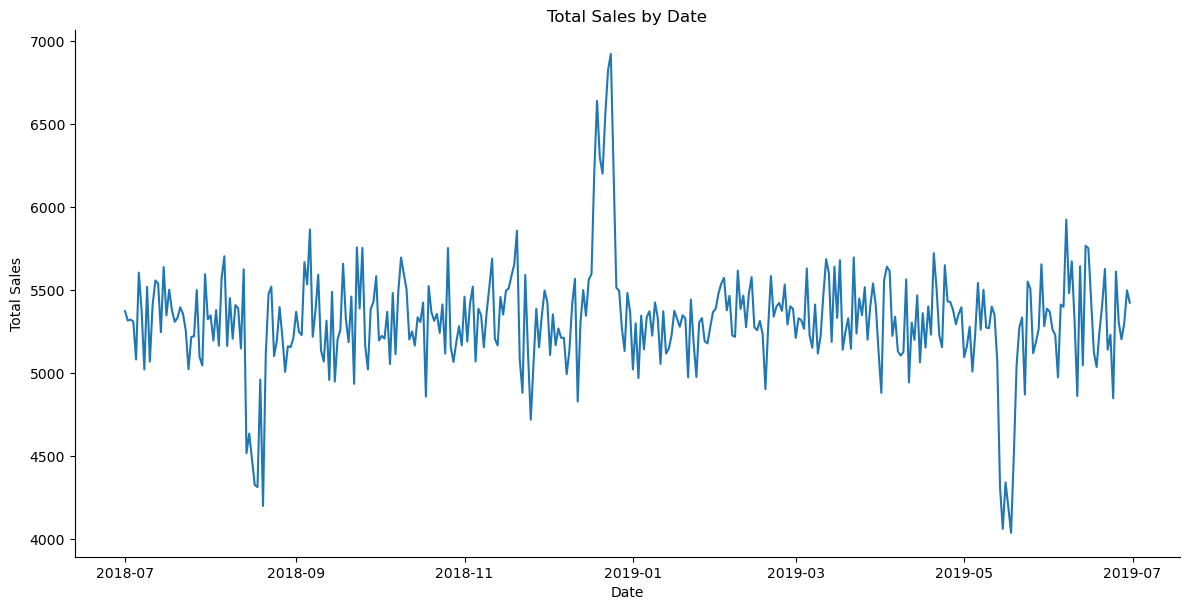

In [49]:
sales_by_date = pd.DataFrame(df.groupby('Date')['Total Sales'].sum().reset_index())

sns.relplot(x='Date', y='Total Sales', data=sales_by_date, kind='line', height=6, aspect=2)
plt.title('Total Sales by Date')
plt.show()

- There are two dips and one peak in total sales.
- Let us look deeper into these

In [50]:
sales_by_date[sales_by_date['Total Sales'] == sales_by_date['Total Sales'].max()]

,Date,Total Sales
176,2018-12-24,6923.0


- Sales by date were highest on `2018-12-24` which is the day before Christmas, which makes sense as a lot of people would buy Snacks for their guests, relatives or friends for Christmas.

In [51]:
sales_by_date[sales_by_date['Total Sales'] < 4500]   ## As sales below are 4500 are mimimas

,Date,Total Sales
46,2018-08-16,4476.60
47,2018-08-17,4324.55
48,2018-08-18,4312.00
50,2018-08-20,4198.20
316,2019-05-14,4310.45
317,2019-05-15,4060.30
318,2019-05-16,4340.05
319,2019-05-17,4192.45
320,2019-05-18,4036.50


- It can be observed that `Total Sales` were not that good in `Mid-August` (2019) and `Mid-May`(2018) days.
- There might be a reason for it, we will look deeper into this later.

Let's us try to answer some questions:

1. `Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?`
2. `How many customers are in each segment?`
3. `How many chips are bought per customer by segment?`
4. `What's the average chip price by customer segment?`

Text(0.5, 1.0, 'Total Sales by LifeStage')

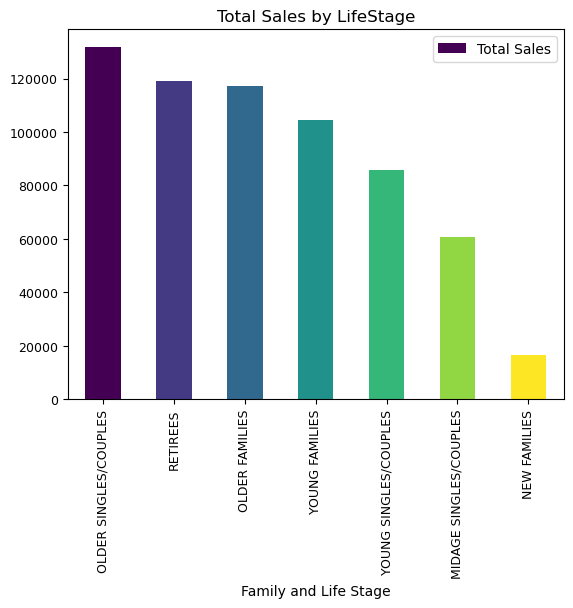

In [52]:
# Let us answer first question and look more into LifeStage

filtered = df[df['Product Type'] == 'Chips']  # Only chips customers
first = pd.DataFrame(filtered.groupby(['Family and Life Stage'])['Total Sales'].sum().reset_index()
                     .sort_values(by='Total Sales', ascending=False))

colors = plt.cm.viridis(np.linspace(0, 1, len(first)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

first.plot.bar(x='Family and Life Stage', y='Total Sales', fontsize='9', color=colors) 
plt.title('Total Sales by LifeStage')

- `Older Couples and Singles` are doing maximum sales, followed by `Retirees` and `Older Families`
- Major sales have been done by senior customers.

Text(0.5, 1.0, 'Total Sales by Shopping Behaviour and Preferences')

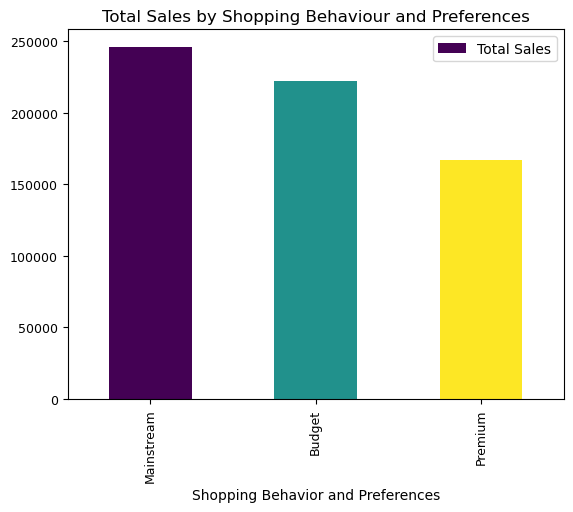

In [53]:
first = pd.DataFrame(filtered.groupby(['Shopping Behavior and Preferences'])['Total Sales'].sum().reset_index()
                     .sort_values(by='Total Sales', ascending=False))

colors = plt.cm.viridis(np.linspace(0, 1, len(first)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

first.plot.bar(x='Shopping Behavior and Preferences', y='Total Sales', fontsize='9', color=colors) 
plt.title('Total Sales by Shopping Behaviour and Preferences')

- `Mainstream` customers are the ones with maximum total sales followed by `Budget` and `Premium`.
- Let us combine both `Life stage` and `Shopping behaviour and Preferences` aspect.

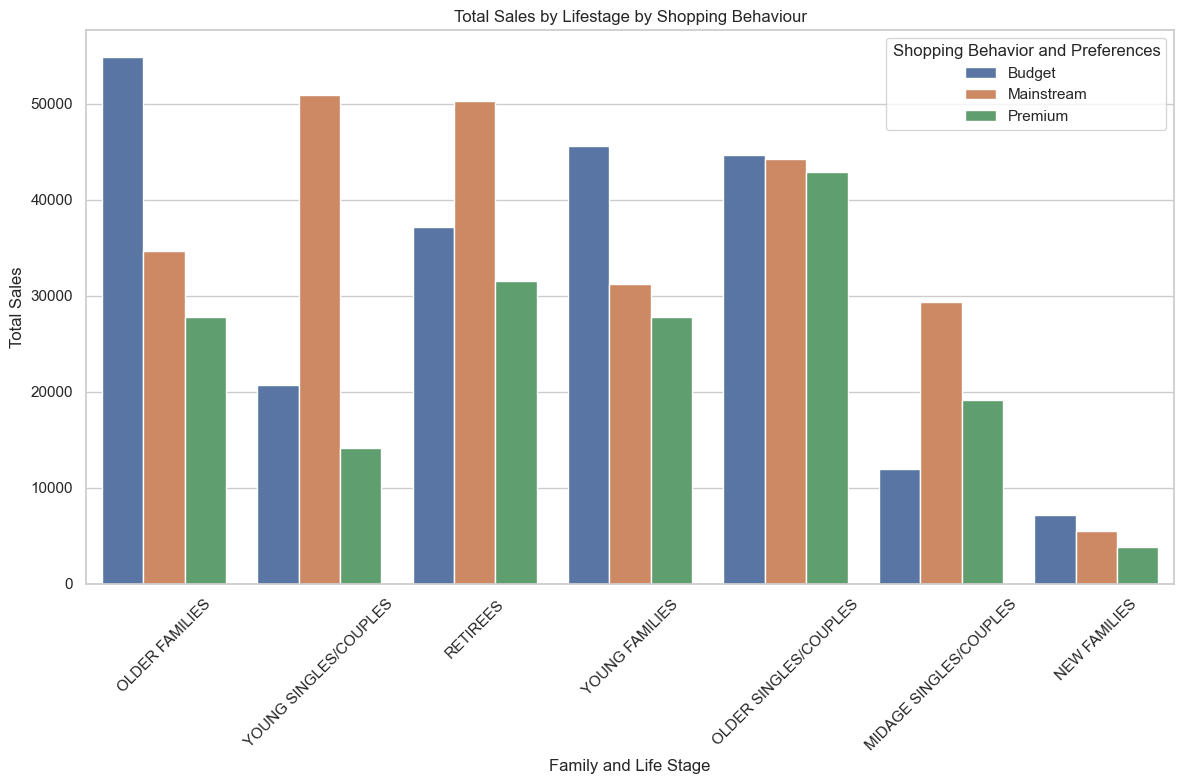

In [54]:
first = pd.DataFrame(filtered.groupby(['Family and Life Stage','Shopping Behavior and Preferences'])['Total Sales'].sum().reset_index()
                     .sort_values(by='Total Sales', ascending=False))

# Set the plot style
sns.set(style="whitegrid")

# Create a single plot for all 21 combinations
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Family and Life Stage', y='Total Sales', hue='Shopping Behavior and Preferences', data=first)

# Set plot labels and title
ax.set_xlabel('Family and Life Stage')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Lifestage by Shopping Behaviour')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Shopping Behavior and Preferences')
plt.tight_layout()
plt.show()


- Lowest `Total Sales` have been in `New Families`
- `Older Families` with `Budget` behaviour have the highest total sales, followed by `Young Singles/ Couples` in `Mainstream` shopping behaviour and `Retirees` in `Mainstream` shopping behaviour.
- `Older Singles/Couples` are the highest total sales in `Premium` shopping behaviour.

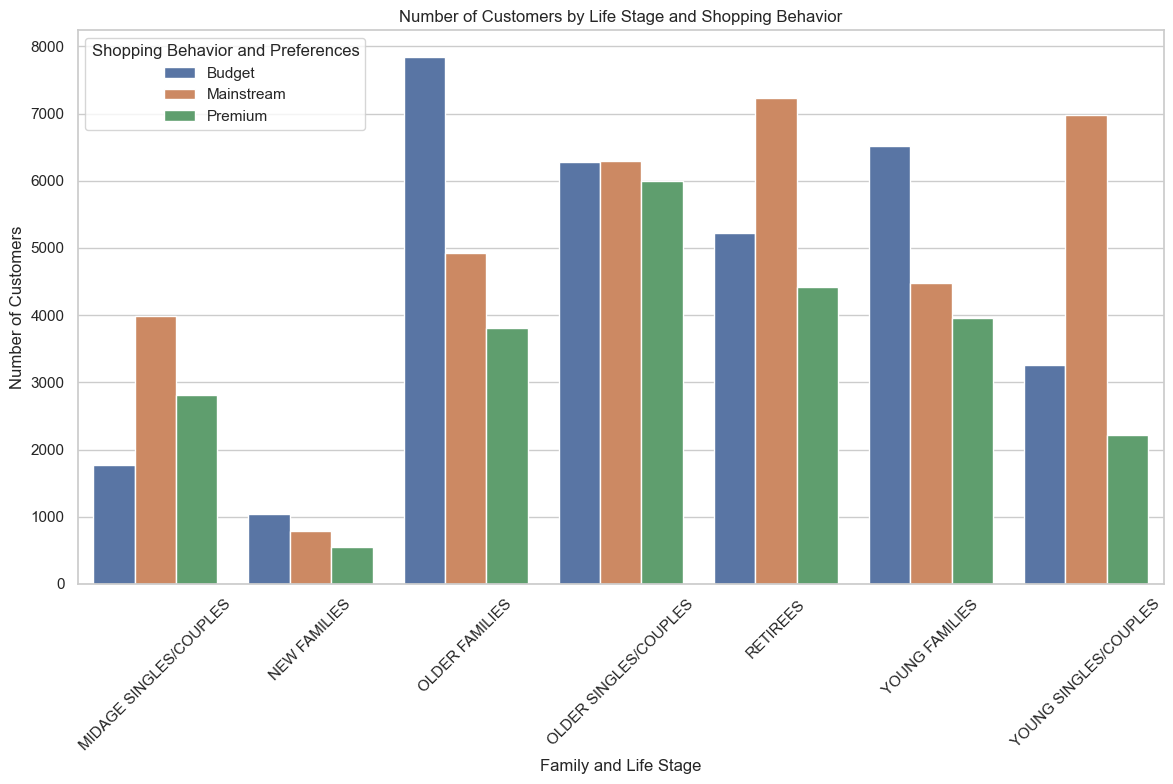

In [55]:
## How many customers are in each segment?

filtered = df[df['Product Type'] == 'Chips']  # Only chips customers
second = pd.DataFrame(filtered.groupby(['Family and Life Stage','Shopping Behavior and Preferences']).size().reset_index(name='Count'))

# Set the plot style
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Family and Life Stage', y='Count', hue='Shopping Behavior and Preferences', data=second)

# Set plot labels and title
ax.set_xlabel('Family and Life Stage')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Life Stage and Shopping Behavior')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Shopping Behavior and Preferences')
plt.tight_layout()
plt.show()


- Lowest `Count` have been in `New Families` which makes sense as they might not consume chips very often yet.
- `Older Families` with `Budget` behaviour have the highest count, followed by `Retirees` in `Mainstream` shopping behaviour and `Younf Singles/Couples` in `Mainstream` shopping behaviour.
- `Older Singles/Couples` are the highest count in `Premium` shopping behaviour.

This is pretty similar to total sales. Let us look deeper into `Average Units per customer segment`.

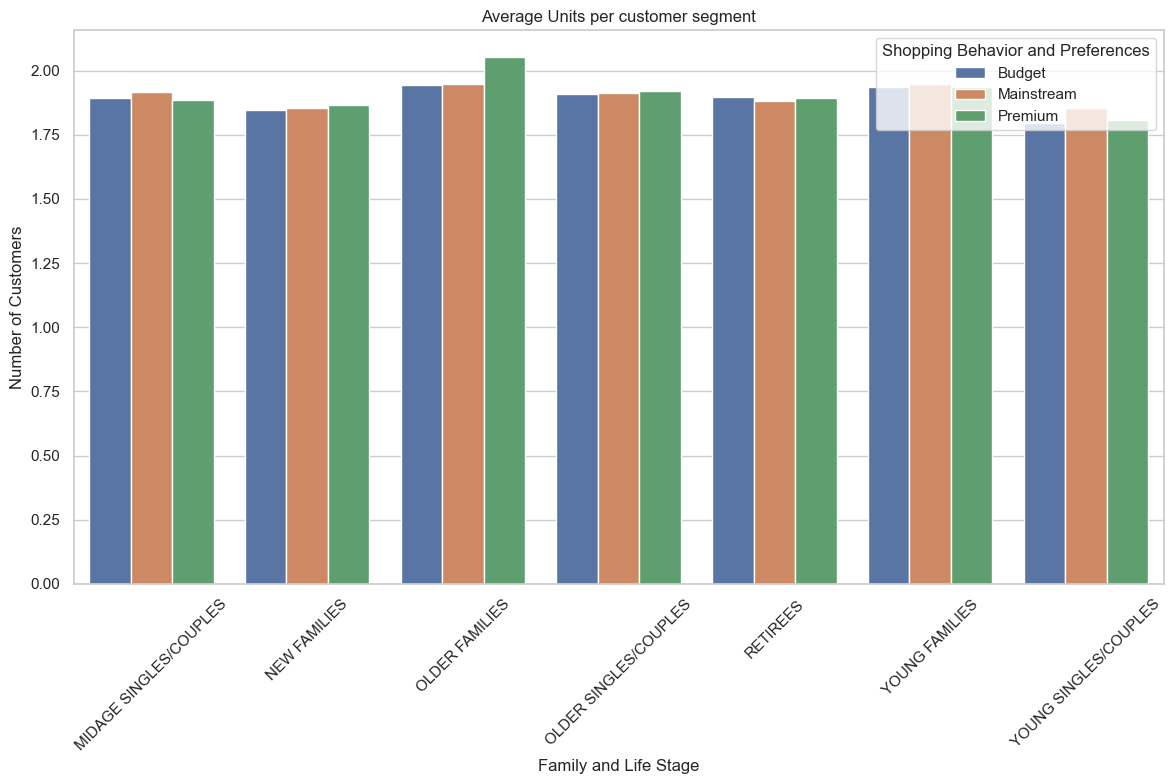

In [56]:
## Average Units per Customer Segment

third = pd.DataFrame(filtered.groupby(['Family and Life Stage','Shopping Behavior and Preferences'])['Quantity'].mean().reset_index())

# Set the plot style
sns.set(style="whitegrid")

# Create a count plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Family and Life Stage', y='Quantity', hue='Shopping Behavior and Preferences', data=third)

# Set plot labels and title
ax.set_xlabel('Family and Life Stage')
ax.set_ylabel('Number of Customers')
ax.set_title('Average Units per customer segment')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Shopping Behavior and Preferences')
plt.tight_layout()
plt.show()

- `Older Families` and `Young Families` tend to buy more units of chips compared to `New Families`
- `New Families` have the lowest average units bought.

In [57]:
df.columns

Index(['Transaction ID', 'Loyalty Card Number', 'Family and Life Stage',
       'Date', 'Shopping Behavior and Preferences', 'Year', 'Month',
       'Day of week', 'Quarter', 'Store Number', 'Product Name', 'Quantity',
       'Total Sales', 'Brand Name', 'Flavor Description', 'Product Type',
       'Size/Weight'],
      dtype='object')

In [58]:
df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales,Brand Name,Flavor Description,Product Type,Size/Weight
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0,Other,Other,Chips,175g
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3,CCs,Nacho Cheese,Other,175g
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,Chips Chicken,Chips,170g
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,Other,Chips,175g
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,Tortilla ChpsHny&Jlpno Chili,Tortilla,150g


Text(0.5, 1.0, 'Popular Brands on Count')

<Figure size 6400x4800 with 0 Axes>

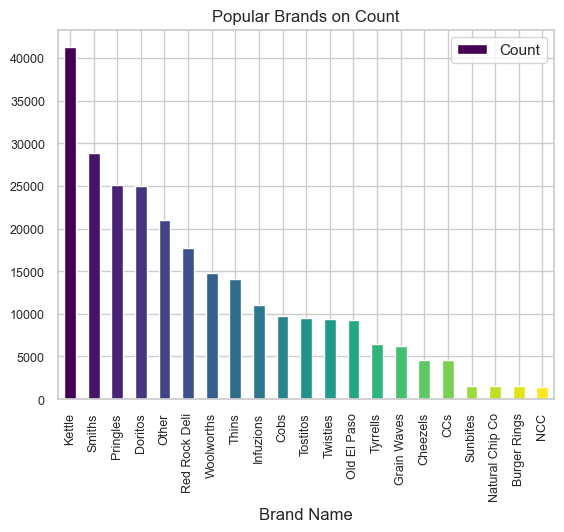

In [59]:
popular_brand = pd.DataFrame(df['Brand Name'].value_counts().reset_index().rename(columns={'index':'Brand Name', 'Brand Name':'Count'}))

colors = plt.cm.viridis(np.linspace(0, 1, len(popular_brand)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

plt.figure(dpi=1000)
popular_brand.plot.bar(x='Brand Name', y='Count', fontsize='9', color=colors) 
plt.title('Popular Brands on Count')

- `Kettle` is the most popular brand on the basis of counts, followed by `Smiths`, `Pringles` and `Doritos`

Text(0.5, 1.0, 'Most sold brands')

<Figure size 6400x4800 with 0 Axes>

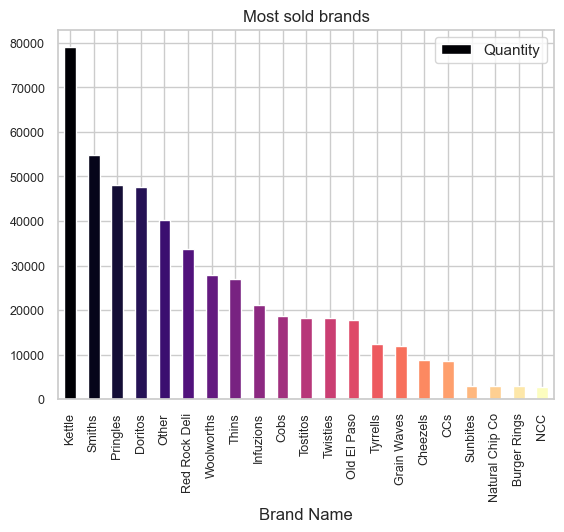

In [60]:
most_sold_brands = pd.DataFrame(df.groupby('Brand Name')['Quantity'].sum().reset_index()).sort_values(by='Quantity', ascending=False)


colors = plt.cm.magma(np.linspace(0, 1, len(most_sold_brands)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

plt.figure(dpi=1000)
most_sold_brands.plot.bar(x='Brand Name', y='Quantity', fontsize='9', color=colors) 
plt.title('Most sold brands')

- `Kettle` is the most popular brand on the basis of quantities, followed by `Smiths`, `Pringles` and `Doritos`
- Basically, there is `similar pattern in number of quantities sold as well as brand popularity`.

Let us see if similar pattern follows in total sales too.

Text(0.5, 1.0, 'Highest Total Sales brands')

<Figure size 6400x4800 with 0 Axes>

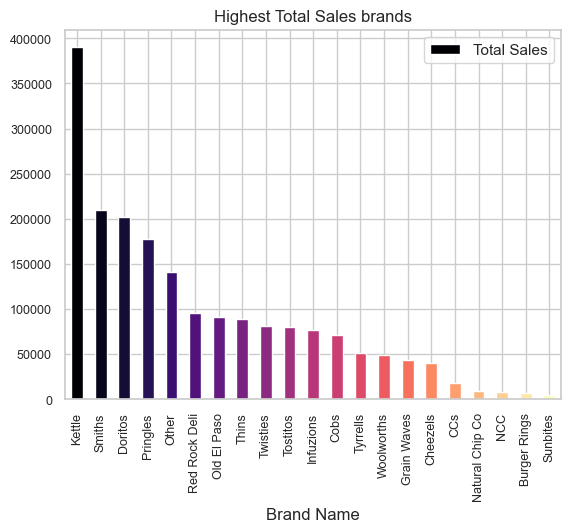

In [61]:
most_sales_brands = pd.DataFrame(df.groupby('Brand Name')['Total Sales'].sum().reset_index()).sort_values(by='Total Sales', ascending=False)

colors = plt.cm.magma(np.linspace(0, 1, len(most_sales_brands)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

plt.figure(dpi=1000)
most_sales_brands.plot.bar(x='Brand Name', y='Total Sales', fontsize='9', color=colors) 
plt.title('Highest Total Sales brands')

- `Kettle` is the most popular brand on the basis of quantities sold, total sales and popularity, followed by `Smiths`, `Pringles` and `Doritos`

In [62]:
df.columns

Index(['Transaction ID', 'Loyalty Card Number', 'Family and Life Stage',
       'Date', 'Shopping Behavior and Preferences', 'Year', 'Month',
       'Day of week', 'Quarter', 'Store Number', 'Product Name', 'Quantity',
       'Total Sales', 'Brand Name', 'Flavor Description', 'Product Type',
       'Size/Weight'],
      dtype='object')

In [76]:
weekly_sales = pd.DataFrame(df.groupby(['Day of week'])['Total Sales'].sum().reset_index()).sort_values(by='Total Sales', ascending=False)
pd.set_option('display.max_rows', None)  # Set the option to display all rows
print(weekly_sales)
pd.reset_option('display.max_rows')  # Reset the option to its default value

  Day of week  Total Sales
3      Sunday    283229.10
0      Friday    279521.30
6   Wednesday    277876.40
2    Saturday    275612.60
1      Monday    274959.95
4    Thursday    272565.65
5     Tuesday    270644.00


- There is `no significant difference in average total sales in any day of week`.
- Similar is true for `Total Sales` of any day of week.

Text(0.5, 1.0, 'Popular Product Types')

<Figure size 6400x4800 with 0 Axes>

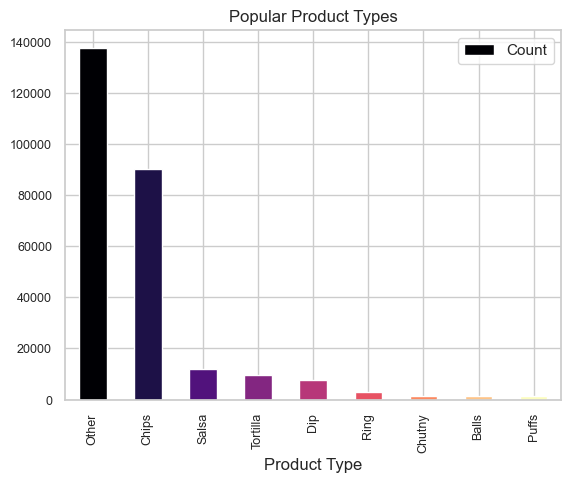

In [81]:
popular_product_type = pd.DataFrame(df['Product Type'].value_counts().reset_index()).rename(columns={'index':'Product Type', 'Product Type':'Count'})

colors = plt.cm.magma(np.linspace(0, 1, len(popular_product_type)))    # plt.cm.viridis colormap to create a gradient of colors for the bars

plt.figure(dpi=1000)
popular_product_type.plot.bar(x='Product Type', y='Count', fontsize='9', color=colors) 
plt.title('Popular Product Types')

- In the named product types, `Chips` is the most popular followed by `Salsa` and `Tortilla`

In [84]:
df.head()

,Transaction ID,Loyalty Card Number,Family and Life Stage,Date,Shopping Behavior and Preferences,Year,Month,Day of week,Quarter,Store Number,Product Name,Quantity,Total Sales,Brand Name,Flavor Description,Product Type,Size/Weight
0,1,1000,YOUNG SINGLES/COUPLES,2018-10-17,Premium,2018,October,Wednesday,4,1,Natural Chip Compny SeaSalt175g,2,6.0,Other,Other,Chips,175g
1,348,1307,MIDAGE SINGLES/COUPLES,2019-05-14,Budget,2019,May,Tuesday,2,1,CCs Nacho Cheese 175g,3,6.3,CCs,Nacho Cheese,Other,175g
2,383,1343,MIDAGE SINGLES/COUPLES,2019-05-20,Budget,2019,May,Monday,2,1,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,Chips Chicken,Chips,170g
3,974,2373,MIDAGE SINGLES/COUPLES,2018-08-17,Budget,2018,August,Friday,3,2,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,Other,Chips,175g
4,1038,2426,MIDAGE SINGLES/COUPLES,2018-08-18,Budget,2018,August,Saturday,3,2,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,Tortilla ChpsHny&Jlpno Chili,Tortilla,150g


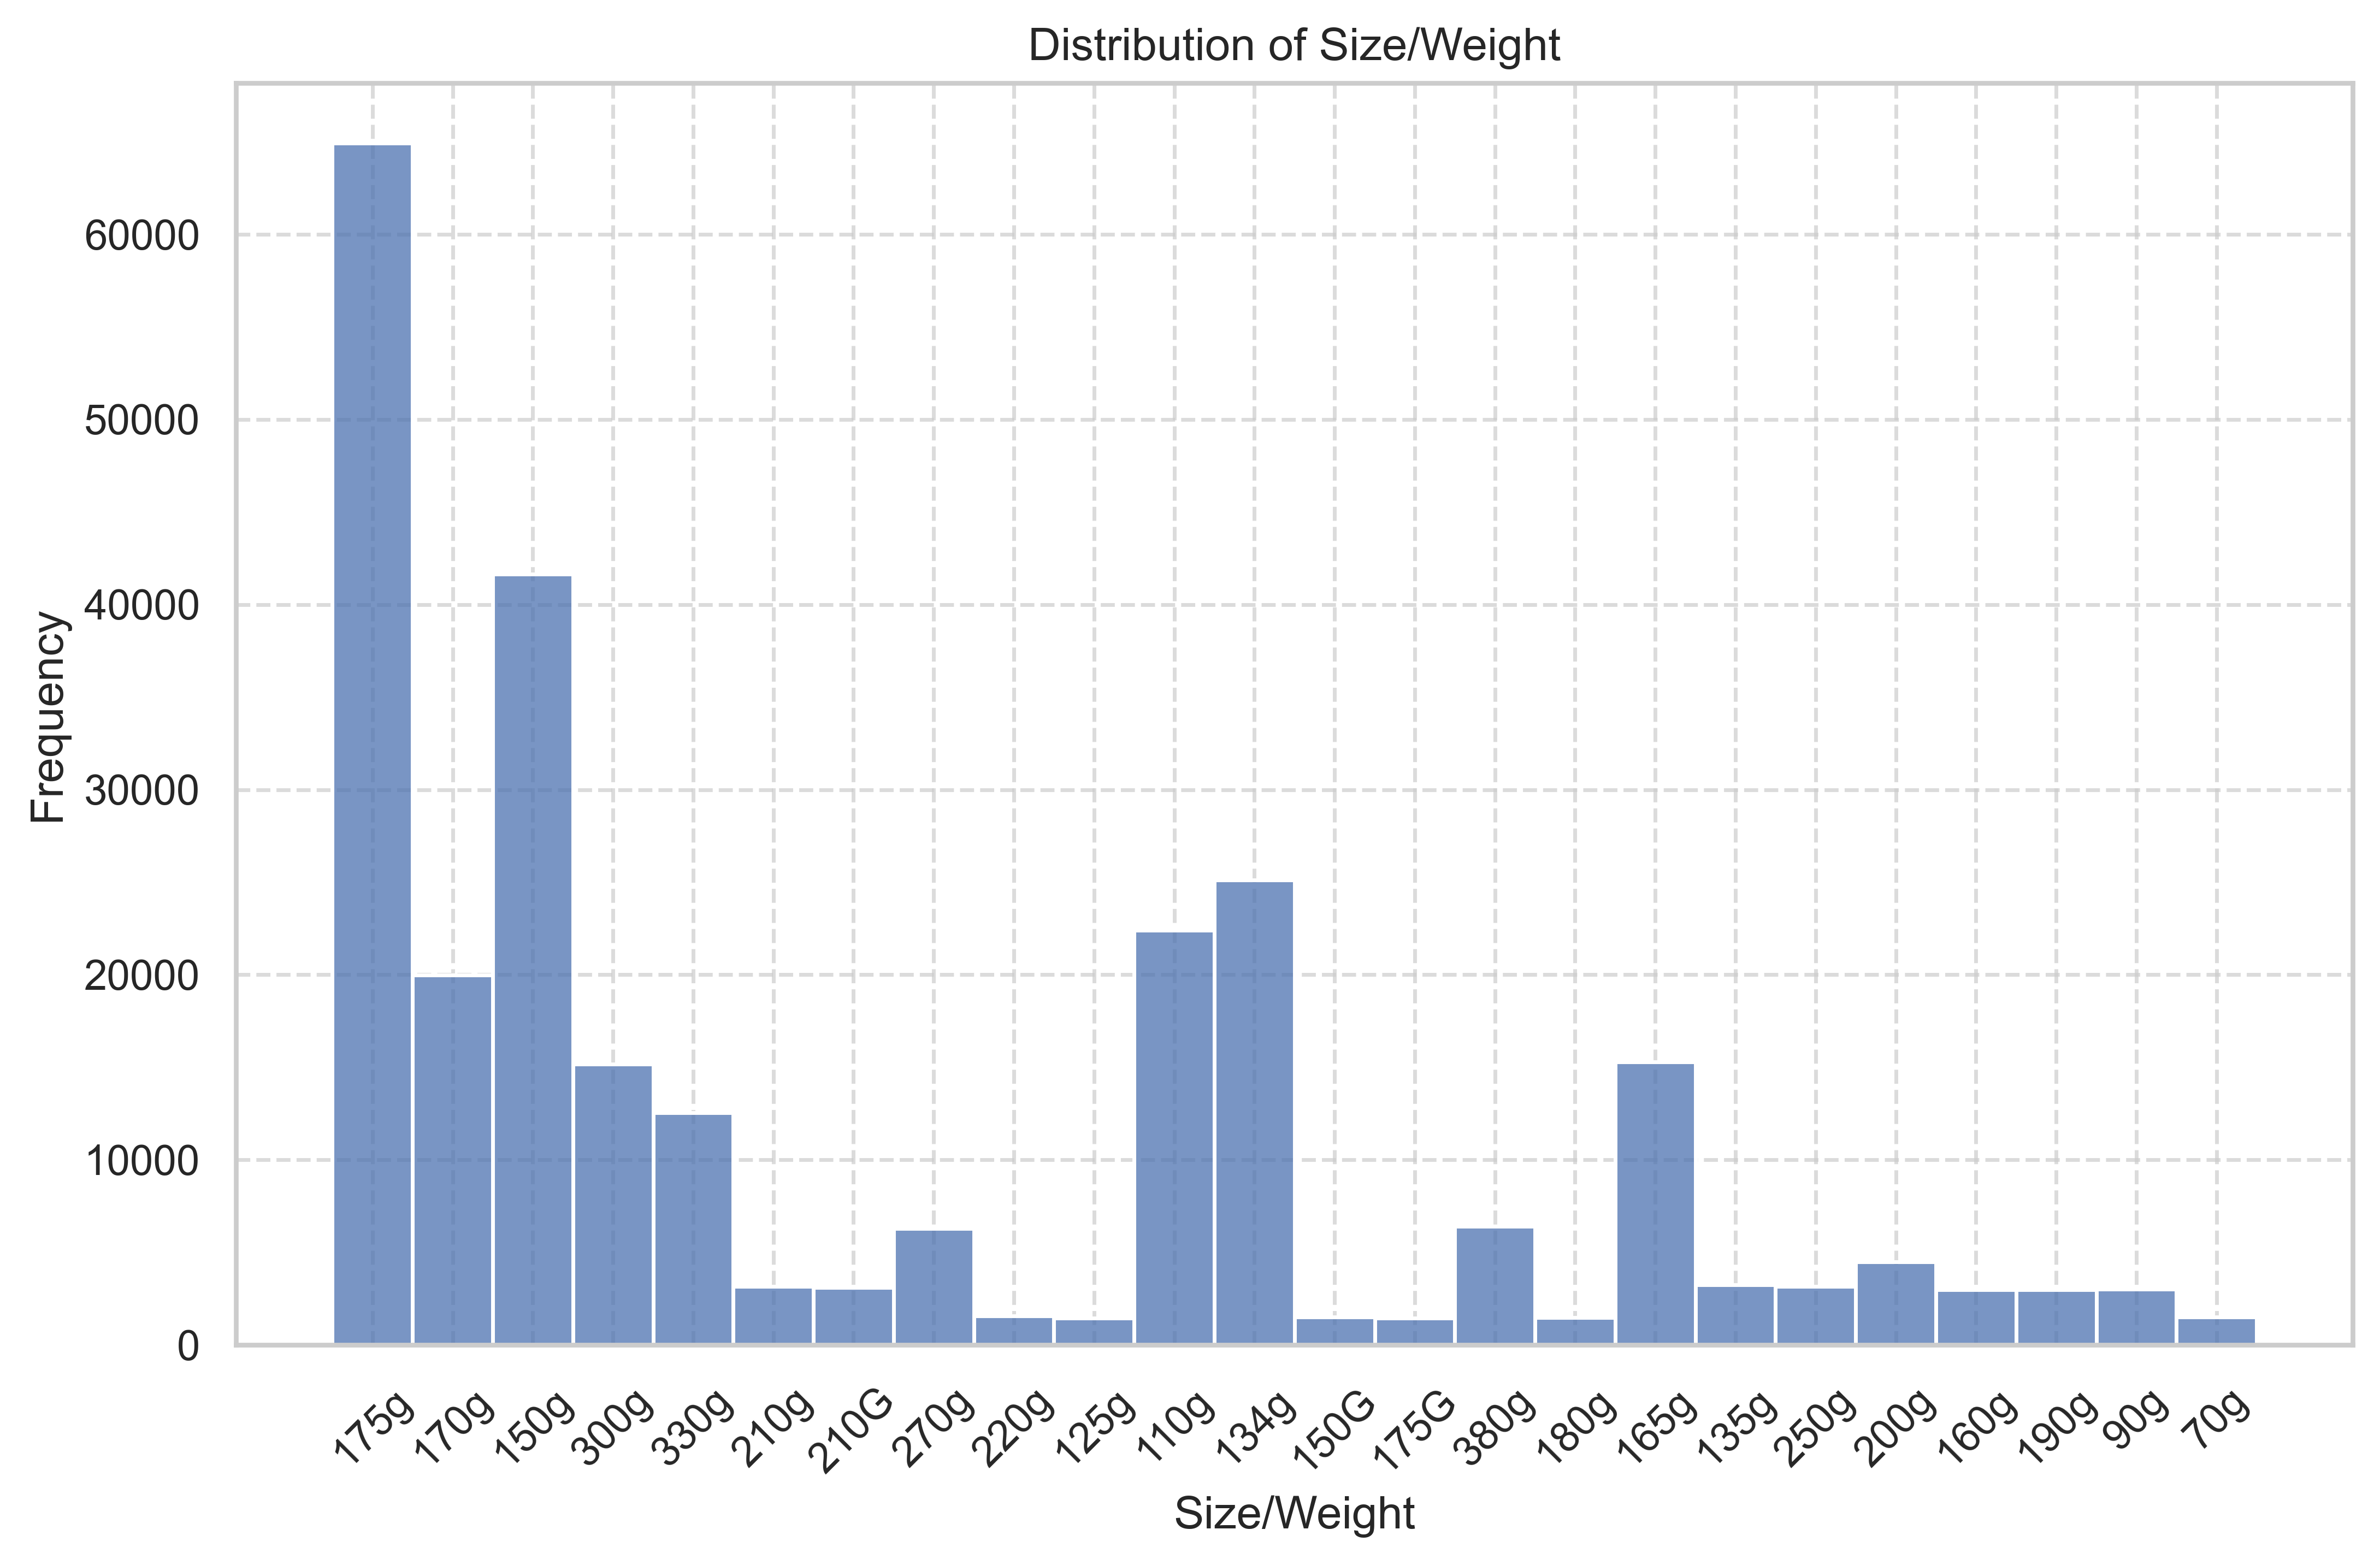

In [100]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=500)

# Create a histogram using Matplotlib
sns.histplot(df['Size/Weight'], kde=False)  # You can enable the KDE for a smoother distribution curve

# Customize the plot appearance
plt.title('Distribution of Size/Weight')
plt.xlabel('Size/Weight')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


- `175g` packets are the most frequent, followed by `150g`, `134g` and `110g`

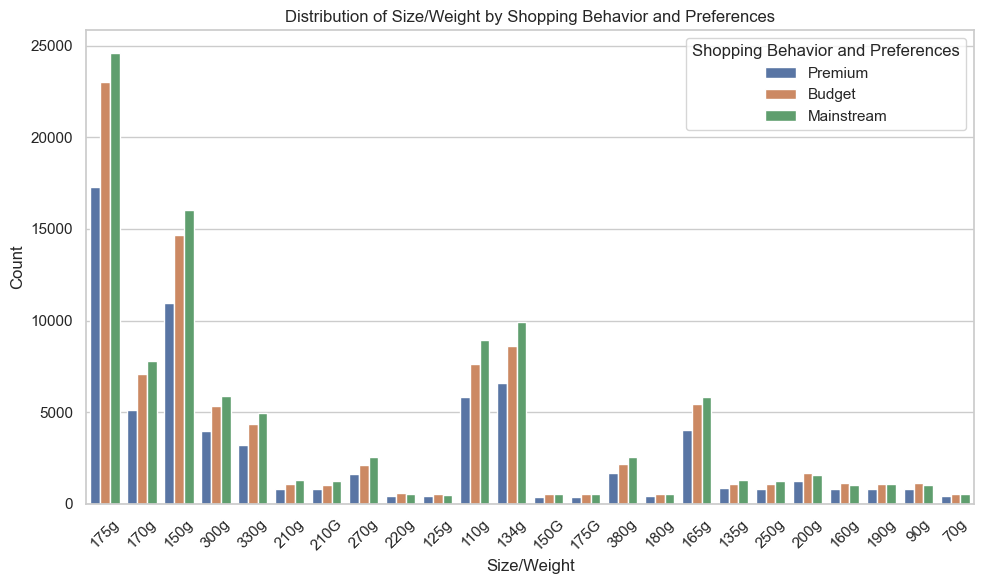

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with "Shopping behavior and Preferences" and "Size/Weight" columns

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a count plot with "Size/Weight" on the x-axis and hue by "Shopping behavior and Preferences"
sns.countplot(x='Size/Weight', hue='Shopping Behavior and Preferences', data=df)

# Customize the plot appearance
plt.title('Distribution of Size/Weight by Shopping Behavior and Preferences')
plt.xlabel('Size/Weight')
plt.ylabel('Count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Shopping Behavior and Preferences')
plt.tight_layout()
plt.show()


- `175g` is the most popular `Size/Weight` in all Shopping Behaviour and Preferences.